## ML algo from scratch



## # Linear Rgression multivaritate variable

In [40]:
import  pandas as pd
import numpy as np
df=pd.read_csv("D:/tip.csv")
print(df)
x=df["total bill"]
y=df["tip"]
x=np.array(x)
y=np.array(y)

   total bill  tip
0          34    5
1         108   17
2          64   11
3          88    8
4          99   14
5          51    5


*x is independent variable*


*y is dependent variable*

In [41]:
class linearRegression:
    def fit(self,x,y):
        self.x=x
        self.y=y
    def ccr(self):
        n=len(self.x)
        nume=(n*np.sum(self.x*self.y))-(np.sum(self.x)*np.sum(self.y))
        deno=np.sqrt((n*np.sum(self.x**2)-np.sum(self.x)**2)*(n*np.sum(self.y**2)-np.sum(self.y)**2)) 
        cc=nume/deno
        return cc 
    if cc<=1 and cc>=0.5555:
           def slope(self):
                x1=np.mean(self.x)
                y1=np.mean(self.y)
                b1_nume=np.sum((self.x-x1)*(self.y-y1))
                b1_dino=np.sum((self.x-x1)**2)
                b1=b1_nume/b1_dino
                return b1
           def intercept(self):
                b0=np.mean(y)-self.slope()*np.mean(x)
                return b0
           def pridict(self,input):
                b1=self.slope()
                b0=self.intercept()
                pri=b0+b1*input
                return pri
    else:
         print("not fit")       


In [42]:
l=linearRegression()
l.fit(x,y)
cc=l.ccr()
print("corelation coefficent:",cc)
slope=l.slope()
print("slope:",slope)
intercept=l.intercept()
print("intercept",intercept)
pridict=l.pridict(200)
print("preidcited tip,",pridict)


corelation coefficent: 0.8656649996294481
slope: 0.14621968616262482
intercept -0.8202567760342365
preidcited tip, 28.42368045649073


## Logistic Regression Multivariate variable
using data set of Loan approval 

In [98]:
import pandas as pd
import numpy as np
import math as mt

df=pd.read_csv("D:/loan_approval_dataset.csv")
df





,loan_id,no_of_dependents,education,income_annum,loan_amount,cibil_score,loan_status
0,1,2,Graduate,9600000,29900000,778,Approved
1,2,0,Not Graduate,4100000,12200000,417,Rejected
2,3,3,Graduate,9100000,29700000,506,Rejected
3,4,3,Graduate,8200000,30700000,467,Rejected
4,5,5,Not Graduate,9800000,24200000,382,Rejected
...,...,...,...,...,...,...,...
4264,4265,5,Graduate,1000000,2300000,317,Rejected
4265,4266,0,Not Graduate,3300000,11300000,559,Approved
4266,4267,2,Not Graduate,6500000,23900000,457,Rejected
4267,4268,1,Not Graduate,4100000,12800000,780,Approved


In [99]:
df=df.drop("loan_id",axis=1)

In [100]:
print(df[" education"].unique())
print(df[" loan_status"].unique())
df[" education"]=df[" education"].map({" Graduate":1," Not Graduate":0})
df[" loan_status"]=df[" loan_status"].map({" Approved":1," Rejected":0})


print(df)




[' Graduate' ' Not Graduate']
[' Approved' ' Rejected']
      no_of_dependents  education  income_annum  loan_amount  cibil_score  \
0                    2          1       9600000     29900000          778   
1                    0          0       4100000     12200000          417   
2                    3          1       9100000     29700000          506   
3                    3          1       8200000     30700000          467   
4                    5          0       9800000     24200000          382   
...                ...        ...           ...          ...          ...   
4264                 5          1       1000000      2300000          317   
4265                 0          0       3300000     11300000          559   
4266                 2          0       6500000     23900000          457   
4267                 1          0       4100000     12800000          780   
4268                 1          1       9200000     29700000          607   

      loan_status  

In [101]:
x=df.drop(" loan_status",axis=1)
y=df[" loan_status"]

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [103]:
import numpy as np
n_features=X_scaled.shape[1]
w=np.zeros(n_features)
b=0
lr=0.01
epoch=1000
def sigmoid(z):
    return 1/(1+np.exp(-z))
for i in range(epoch):
    z=np.dot(X_scaled,w)+b
    y_pridi=sigmoid(z)

    error=y_pridi-y
    derivative_of_loss_fn_wrt_weight=((1/len(X_scaled) * np.dot(X_scaled.T,error)))
    derivative_of_loss_fn_wrt_bias=1/((len(X_scaled)*np.sum(error)))

    w=w-lr*derivative_of_loss_fn_wrt_weight
    b=b-lr*derivative_of_loss_fn_wrt_bias
print("ho gaya bhai Train")    

ho gaya bhai Train


In [104]:
z=np.dot(X_scaled,w)+b
y_pridi=sigmoid(z)
y_pred_label = [1 if i >= 0.5 else 0 for i in y_pridi]
X = df[[" no_of_dependents", " education", " income_annum", " loan_amount", " cibil_score"]]
mean=X.mean()
std=X.std()
print(mean)
print(std)


no_of_dependents    2.498712e+00
education           5.022253e-01
income_annum        5.059124e+06
loan_amount         1.513345e+07
cibil_score         5.999361e+02
dtype: float64
no_of_dependents    1.695910e+00
education           5.000536e-01
income_annum        2.806840e+06
loan_amount         9.043363e+06
cibil_score         1.724304e+02
dtype: float64


In [109]:
# New input
# Assume tumne ye kiya
mean = X.mean()
std = X.std()

# Tumhara ek new input
new_input = np.array([[2, 1, 9000000, 25000000, 700]])  # Shape (1,5)

# Ab scaling karo
new_input_scaled = (new_input - mean.values) / std.values


# Predict karo
z = np.dot(new_input_scaled, w) + b
y_pred = sigmoid(z)
label = 1 if y_pred >= 0.5 else 0

print("Prediction:", label)
if label==1:
    print("APPROVED")
else:
    print("NOT APPROVED")    


Prediction: 1
APPROVED


# Decison Tree

In [ ]:
import math
from collections import Counter

class EntropyCalculator:
    def __init__(self, X, y):
        self.X = X  # Feature matrix (list of lists)
        self.y = y  # Labels

    def entropy(self, labels):
        counter = Counter(labels)
        total = len(labels)
        entropy = 0
        for count in counter.values():
            prob = count / total
            entropy -= prob * math.log2(prob)
        return entropy

    def information_gain(self, feature_index, threshold):
        # Full entropy
        parent_entropy = self.entropy(self.y)

       
        left_labels = []
        right_labels = []

        for i in range(len(self.X)):
            if self.X[i][feature_index] <= threshold:
                left_labels.append(self.y[i])
            else:
                right_labels.append(self.y[i])

        # Weighted child entropy
        n = len(self.y)
        n_left = len(left_labels)
        n_right = len(right_labels)

        if n_left == 0 or n_right == 0:
            return 0  # Invalid split

        left_entropy = self.entropy(left_labels)
        right_entropy = self.entropy(right_labels)

        weighted_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
        info_gain = parent_entropy - weighted_entropy

        return info_gain

# K-Mean Clustering

In [35]:
import numpy as np
import pandas as pd
import random

class kmeans:
    def __init__(self,n_cluster=2,max_iter=100):
        self.n_cluster=n_cluster
        self.max_iter=max_iter
        self.centeroid=None
    def   fit_pridict(self,X):
        random_sampel=random.sample(range(0,X.shape[0]),self.n_cluster)
        self.centeroid=X[random_sampel]

        for i in range(self.max_iter):
           cluster_group=self.assing_cluster(X)
           old_centroid=self.centeroid

           self.centeroid=self.move_centroid(X,cluster_group)
           if (old_centroid==self.centeroid).all():
               break
        return cluster_group       

    def assing_cluster(self,X):
        cluster_group=[]
        distance=[]
        for row in  X:
            for centroid in self.centeroid:
                distance.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distace=min(distance)
            index_pos=distance.index(min_distace)
            cluster_group.append(index_pos)
            distance.clear()
        return np.array(cluster_group)
    def move_centroid(self,X,cluster_group):
        new_centroid=[]
        cluster_type=np.unique(cluster_group)
        for type in cluster_type:
            new_centroid.append(X[cluster_group==type].mean(axis=0))
        return np.array(new_centroid)                




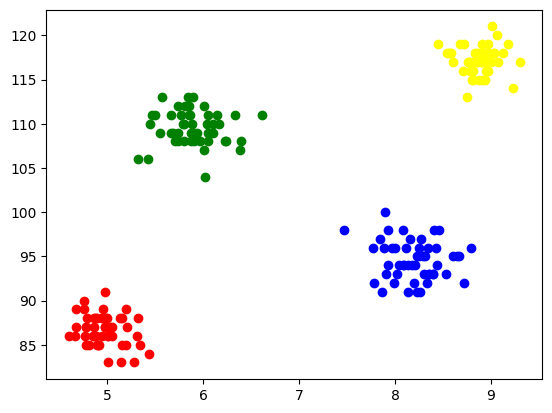

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import pandas as pd


df = pd.read_csv("D:/student_clustering.csv")

X = df.iloc[:,:].values

km = kmeans(n_cluster=4,max_iter=500)
y_means = km.fit_pridict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

# Naive-Bias

In [1]:
import pandas as pd
import numpy as np


In [11]:
data=pd.read_csv("D:/play_tennis.csv")
data=data.drop(columns=["day"])


In [14]:
data.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [18]:
data["play"].value_counts()

play
Yes    9
No     5
Name: count, dtype: int64

In [19]:
pro_of_yes=9/14
pro_of_no=5/14


In [21]:
pd.crosstab(data["outlook"],data["play"])

play,No,Yes
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [22]:
pro_of_over_no=0
pro_of_rain_no=2/5
pro_of_sunny_no=3/5

pro_of_over_yes=4/9
pro_of_rain_yes=3/9
pro_of_sunny_yes=2/9

In [25]:
pd.crosstab(data["temp"],data["play"])


play,No,Yes
temp,,
Cool,1,3
Hot,2,2
Mild,2,4


In [26]:
pro_of_cool_no=1/5
pro_of_hot_no=2/5
pro_of_mild_no=2/5

pro_of_cool_yes=3/9
pro_of_hot_yes=2/9
pro_of_mild_yes=4/9


In [28]:
pd.crosstab(data["humidity"],data["play"])


play,No,Yes
humidity,,
High,4,3
Normal,1,6


In [ ]:
pro_of_high_no=4/5
pro_of_normal_no=1/5

pro_of_high_yes=3/9
pro_of_normal_yes=6/9
